# Coursework for statistical data science

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("CONFIDENTIALdata.csv")

In [3]:
data.head()

,type,run_id,V1,V2,V3,V4,V5,V6,V7,V8,...,V5581,V5582,V5583,V5584,V5585,V5586,V5587,V5588,V5589,V5590
0,CF,4003RA0E,-3.008634,-2.804786,-2.620355,-2.444819,-2.284497,-2.126709,-1.980752,-1.837373,...,-8.231745,-8.243517,-8.249134,-8.262009,-8.272902,-8.282454,-8.294166,-8.300036,-8.321509,-8.323730
1,CF,4003RA5W,-3.413081,-3.260658,-3.112734,-2.976448,-2.843604,-2.714217,-2.590627,-2.461359,...,-7.293016,-7.293702,-7.325248,-7.316993,-7.320196,-7.349626,-7.337020,-7.349879,-7.372007,-7.361413
2,CF,4003RAEE,-3.427595,-3.269479,-3.122464,-2.976686,-2.847523,-2.714426,-2.587900,-2.465859,...,-7.176549,-7.182256,-7.190958,-7.200048,-7.212073,-7.218987,-7.225827,-7.233859,-7.246092,-7.253305
3,CF,4003RAF2,-3.910885,-3.749669,-3.598482,-3.449634,-3.306255,-3.177122,-3.040150,-2.905444,...,-7.835568,-7.846446,-7.852197,-7.862032,-7.871822,-7.879795,-7.886515,-7.899464,-7.907421,-7.914380
4,CF,4003RAJ8,-3.438890,-3.274277,-3.121451,-2.966479,-2.827421,-2.688572,-2.553001,-2.422318,...,-8.326949,-8.127720,-8.206577,-8.375884,-8.188845,-8.233503,-8.359105,-8.237795,-8.281709,-8.370266


In [4]:
data.isnull().sum()

type      0
run_id    0
V1        0
V2        0
V3        0
         ..
V5586     0
V5587     0
V5588     0
V5589     0
V5590     0
Length: 5592, dtype: int64

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5581,V5582,V5583,V5584,V5585,V5586,V5587,V5588,V5589,V5590
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,-7.157182,-6.476997,-6.106226,-5.771927,-5.479404,-5.213297,-4.951755,-4.711798,-4.482739,-4.261002,...,-10.474193,-10.482904,-10.497117,-10.514066,-10.527532,-10.541632,-10.556182,-10.569150,-10.587776,-10.602348
std,12.576594,10.252101,9.414950,8.779347,8.250546,7.795119,7.393387,7.033587,6.706829,6.408966,...,1.470487,1.473055,1.474739,1.477062,1.481036,1.482820,1.484846,1.488270,1.491349,1.493435
min,-83.958710,-68.007149,-62.447193,-58.223164,-54.722691,-51.696323,-48.991627,-46.567684,-44.337025,-42.282631,...,-14.715315,-14.726119,-14.738338,-14.750318,-14.774994,-14.788972,-14.798061,-14.809968,-14.836328,-14.847086
25%,-5.561852,-5.273395,-5.036891,-4.838386,-4.637592,-4.434907,-4.247912,-4.060842,-3.860518,-3.697508,...,-11.584507,-11.603662,-11.624211,-11.636392,-11.665524,-11.680791,-11.688107,-11.711592,-11.720689,-11.752101
50%,-4.821837,-4.601851,-4.349500,-4.139483,-3.945217,-3.744245,-3.570184,-3.392428,-3.203318,-3.052623,...,-10.496201,-10.511683,-10.528373,-10.536746,-10.556878,-10.575088,-10.588677,-10.598244,-10.598213,-10.629357
75%,-4.229985,-3.943056,-3.726297,-3.543229,-3.357746,-3.190756,-3.050380,-2.899998,-2.739266,-2.535970,...,-9.850861,-9.872602,-9.881252,-9.900668,-9.907485,-9.929063,-9.939628,-9.953299,-9.968028,-9.979063
max,0.015035,0.015378,0.014693,0.015303,0.015408,0.015154,0.015065,0.015303,0.015467,0.014931,...,-6.946252,-6.942228,-6.988362,-6.974713,-6.998122,-6.993652,-7.003219,-7.008300,-7.028581,-7.035137


In [6]:
data.shape

(167, 5592)

In [7]:
## Calculate outliers
from scipy import stats
import numpy as np

# Select numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_data.dropna()))

# Create a mask for outliers (Z-score > 3)
outliers_mask = (z_scores > 3)

# Show rows that contain at least one outlier
rows_with_outliers = data.iloc[np.where(outliers_mask.any(axis=1))]

print(f"Number of rows with outliers: {len(rows_with_outliers)}")
display(rows_with_outliers.head()) 

Number of rows with outliers: 23


,type,run_id,V1,V2,V3,V4,V5,V6,V7,V8,...,V5581,V5582,V5583,V5584,V5585,V5586,V5587,V5588,V5589,V5590
5,CF,4003RAOS,-3.867060,-3.610701,-3.395662,-3.186495,-2.994478,-2.812237,-2.638325,-2.472476,...,-11.551859,-11.546807,-11.567341,-11.581124,-11.593745,-11.612939,-11.616649,-11.627214,-11.661904,-11.657344
66,FT,4140IE88,-6.816432,-6.507978,-6.277606,-6.048367,-5.836964,-5.625830,-5.408035,-5.211324,...,-14.063703,-14.081569,-14.104234,-14.121742,-14.153139,-14.174060,-14.192925,-14.214502,-14.244215,-14.263974
79,FT,4143IEA6,-2.885297,-2.819941,-2.506316,-2.366692,-2.308756,-2.066106,-1.873911,-1.893401,...,-7.699266,-7.712276,-7.715807,-7.725567,-7.741795,-7.745878,-7.753060,-7.760899,-7.773832,-7.782817
81,FT,4143IEDI,-2.309799,-2.104208,-1.906410,-1.766294,-1.594752,-1.421318,-1.302347,-1.129493,...,-7.864402,-7.871927,-7.884667,-7.893324,-7.912532,-7.924886,-7.935778,-7.953123,-7.969366,-7.982255
84,FT,4143IEII,-3.474132,-3.159300,-3.369183,-2.989933,-2.837390,-3.141180,-2.671302,-2.642855,...,-6.946252,-6.942228,-6.988362,-6.974713,-6.998122,-6.993652,-7.003219,-7.008300,-7.028581,-7.035137


In [8]:
data[['type']].value_counts()

type
GS      89
FT      54
CF      24
Name: count, dtype: int64

In [9]:
data_cf = data.loc[data['type'] == 'CF']
data_ft = data.loc[data['type'] == 'FT']
data_gs = data.loc[data['type'] == 'GS']

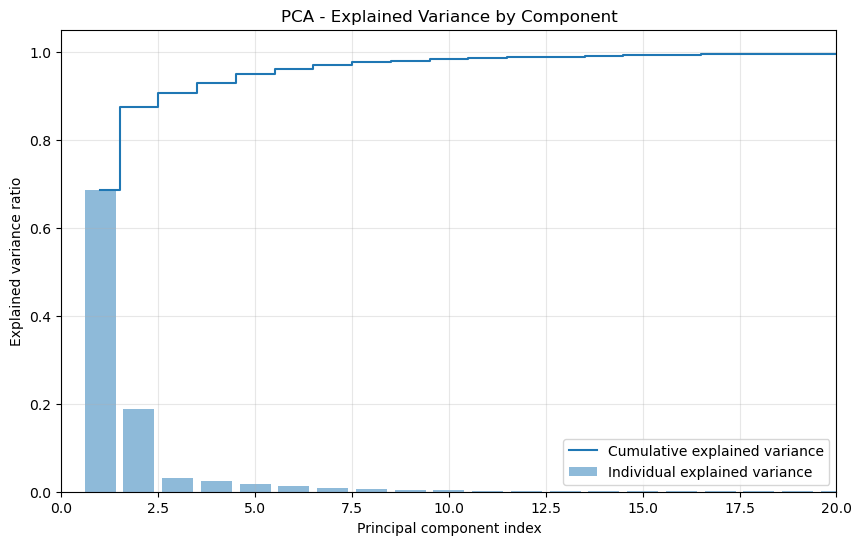

Number of components describing 95% variance: 6
Variance explained by PC1: 0.6853
Variance explained by PC2: 0.1882


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Prepare Data
# Drop NaNs if any exist (PCA doesn't support missing values)
# If you used the 'set to NaN' method previously, fill them or drop rows
df_pca = data.select_dtypes(include=[np.number]).dropna() 

# 2. Standardize the Data (Mean=0, Variance=1) - Critical for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# 3. Run PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 4. Plot Explained Variance (Scree Plot)
plt.figure(figsize=(10, 6))

# Bar plot for individual components
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')

# Step plot for cumulative variance
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA - Explained Variance by Component')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Show plot for first 20 components (to zoom in)
plt.xlim(0, 20) 
plt.show()

# 5. Print Summary
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components describing 95% variance: {n_95}")
print(f"Variance explained by PC1: {explained_variance[0]:.4f}")
print(f"Variance explained by PC2: {explained_variance[1]:.4f}")

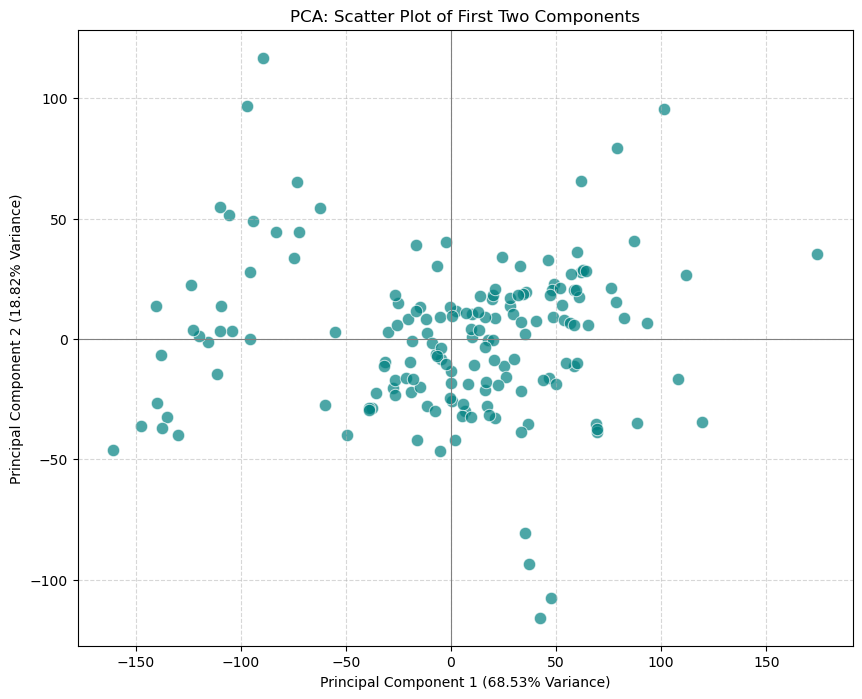

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the first two components
pca_df = pd.DataFrame(data=pca_data[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7, s=80, color='teal')

plt.title('PCA: Scatter Plot of First Two Components')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.show()

In [12]:
# List categorical columns (object/string type)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Available categorical columns for coloring:", list(categorical_cols))

Available categorical columns for coloring: ['type', 'run_id']


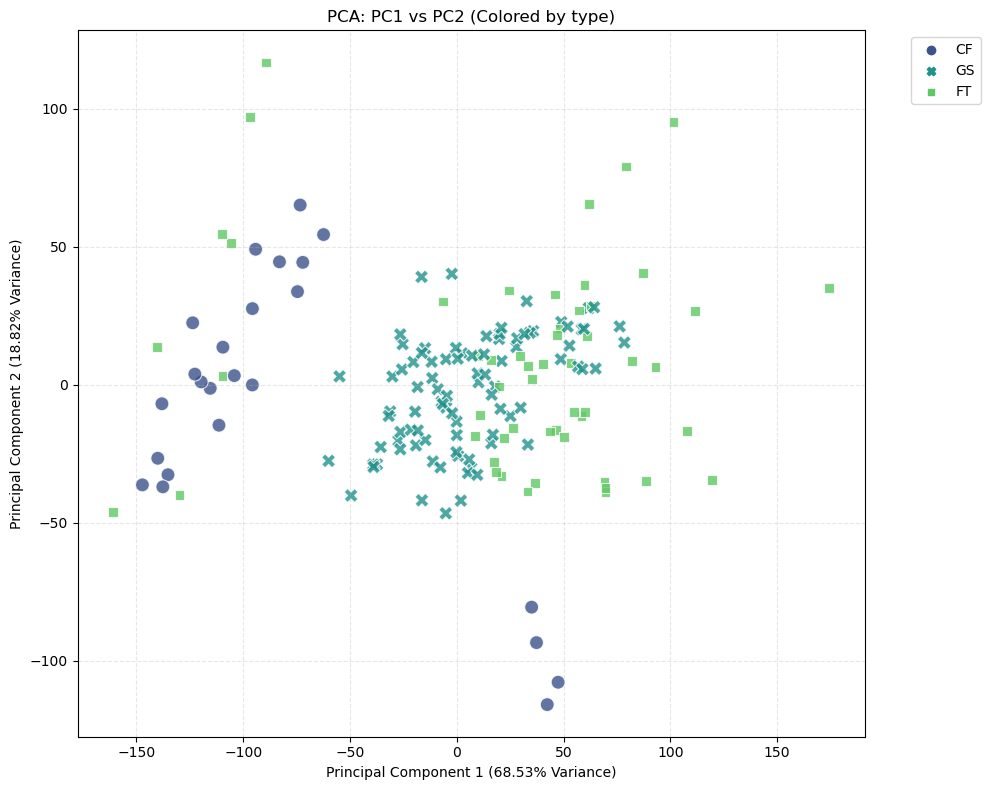

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the indices match between PCA results and original data
# We use the index from df_pca (the data used for PCA) to pull the correct labels
target_column = 'type'  # <--- REPLACE THIS with your actual column name

# Add the target column to the PCA dataframe
# We use .loc to ensure we get the rows that weren't dropped during cleaning
pca_df['Group'] = data.loc[df_pca.index, target_column]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Group',      # Color by this column
    style='Group',    # Shape by this column (optional, good for accessibility)
    data=pca_df, 
    palette='viridis', 
    s=100, 
    alpha=0.8
)

plt.title(f'PCA: PC1 vs PC2 (Colored by {target_column})')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

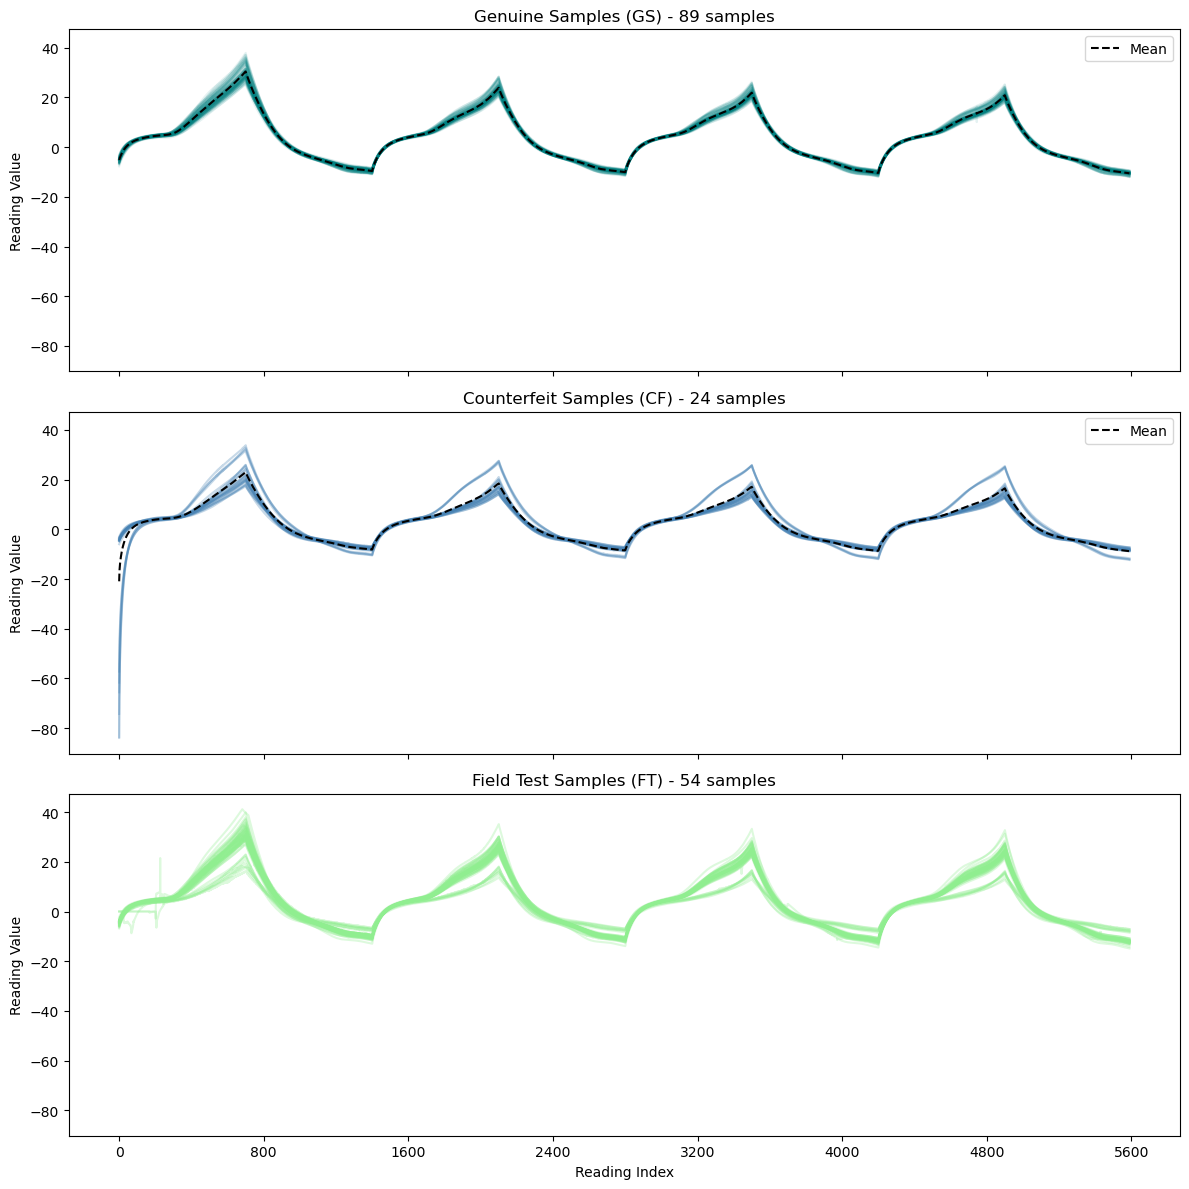

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker # Import ticker for axis control

# Select only numeric columns (the signal data)
signal_data = data.select_dtypes(include=[np.number])

# Get class labels
labels = data['type'] 

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

# 1. Plot Genuine Samples (GS)
gs_signals = signal_data[labels == 'GS'].T
# Create an index array (0, 1, 2...) for plotting to avoid string labels on x-axis
x_indices = np.arange(len(gs_signals)) 
axes[0].plot(x_indices, gs_signals, color='teal', alpha=0.1) 
axes[0].set_title(f'Genuine Samples (GS) - {gs_signals.shape[1]} samples')
axes[0].set_ylabel('Reading Value')
axes[0].plot(x_indices, gs_signals.mean(axis=1), color='black', linewidth=1.5, linestyle='--', label='Mean')
axes[0].legend(loc='upper right')

# 2. Plot Counterfeit Samples (CF)
cf_signals = signal_data[labels == 'CF'].T
axes[1].plot(x_indices, cf_signals, color='steelblue', alpha=0.3)
axes[1].set_title(f'Counterfeit Samples (CF) - {cf_signals.shape[1]} samples')
axes[1].set_ylabel('Reading Value')
axes[1].plot(x_indices, cf_signals.mean(axis=1), color='black', linewidth=1.5, linestyle='--', label='Mean')
axes[1].legend(loc='upper right')

# 3. Plot Field Test Samples (FT)
ft_signals = signal_data[labels == 'FT'].T
axes[2].plot(x_indices, ft_signals, color='lightgreen', alpha=0.3)
axes[2].set_title(f'Field Test Samples (FT) - {ft_signals.shape[1]} samples')
axes[2].set_ylabel('Reading Value')
axes[2].set_xlabel('Reading Index')

# FIX: Set X-Axis to show only nice numbers (e.g., 0, 1000, 2000...)
# Instead of plotting the column names (strings), we plotted using x_indices (integers).
# Now we just tell matplotlib to format the axis linearly.
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10)) # Show max 10 labels

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prepare Data
# Separate Known (Train) vs Unknown (Field Test)
known_data = data[data['type'].isin(['GS', 'CF'])].copy()
field_test_data = data[data['type'] == 'FT'].copy()

# Extract Features (Signal) and Labels
X = known_data.select_dtypes(include=[np.number])
y = known_data['type'] # 'GS' or 'CF'

# Extract Features for Field Test
X_ft = field_test_data.select_dtypes(include=[np.number])

# 2. Build Pipeline (Scale -> PCA -> Logistic Regression)
# We choose n_components=10 based on your previous scree plot (usually covers >95% variance)
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('pca', PCA(n_components=10)),     # Reduce dimensions
    ('clf', LogisticRegression(random_state=42)) # Classifier
])

# 3. Evaluate Model (Cross-Validation)
# We use StratifiedKFold to ensure GS/CF ratio is preserved in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

print(f"--- Model Performance (5-Fold CV) ---")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

--- Model Performance (5-Fold CV) ---
Mean Accuracy: 0.9094
Standard Deviation: 0.0953


c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# 4. Train Final Model on All Known Data
pipeline.fit(X, y)

# Check Confusion Matrix on Training Data (just to see if it separates them well)
y_pred_train = pipeline.predict(X)
print("\n--- Confusion Matrix (Training Set) ---")
print(confusion_matrix(y, y_pred_train))
print("\nClassification Report:\n", classification_report(y, y_pred_train))


--- Confusion Matrix (Training Set) ---
[[24  0]
 [ 0 89]]

Classification Report:
               precision    recall  f1-score   support

          CF       1.00      1.00      1.00        24
          GS       1.00      1.00      1.00        89

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Predictions for Field Test Samples ---
Number of unsure predictions (40-60% confidence): 0


,Run_ID,Predicted_Type,Prob_CF,Prob_GS
65,4140IE0E,GS,0.000000e+00,1.000000
66,4140IE88,GS,0.000000e+00,1.000000
67,4140IEGB,GS,0.000000e+00,1.000000
68,4140IEGJ,GS,0.000000e+00,1.000000
69,4140IEMF,GS,0.000000e+00,1.000000
70,4140IEPQ,GS,0.000000e+00,1.000000
71,4140IEV0,GS,0.000000e+00,1.000000
72,4140IEVV,GS,0.000000e+00,1.000000
73,4143IE1O,GS,3.108624e-15,1.000000
74,4143IE4C,GS,5.822396e-02,0.941776


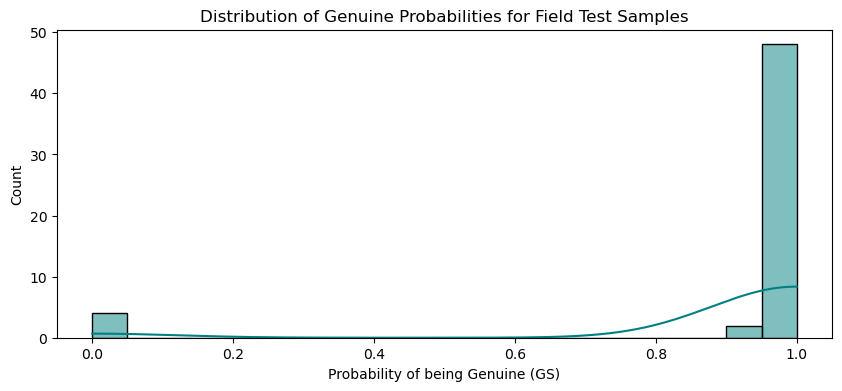

In [19]:
# 5. Predict Field Test Samples
print("\n--- Predictions for Field Test Samples ---")
ft_predictions = pipeline.predict(X_ft)
ft_probs = pipeline.predict_proba(X_ft)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Run_ID': field_test_data['run_id'], # Assuming run_id exists
    'Predicted_Type': ft_predictions,
    'Prob_CF': ft_probs[:, 0], # Probability of being Counterfeit (check index order)
    'Prob_GS': ft_probs[:, 1]  # Probability of being Genuine
})

# Show the 'risky' predictions (where probability is between 40% and 60%)
risky_preds = results_df[(results_df['Prob_GS'] > 0.4) & (results_df['Prob_GS'] < 0.6)]

print(f"Number of unsure predictions (40-60% confidence): {len(risky_preds)}")
display(results_df.head(10))

# Optional: Visualize Probabilities
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.histplot(results_df['Prob_GS'], bins=20, kde=True, color='teal')
plt.title('Distribution of Genuine Probabilities for Field Test Samples')
plt.xlabel('Probability of being Genuine (GS)')
plt.show()

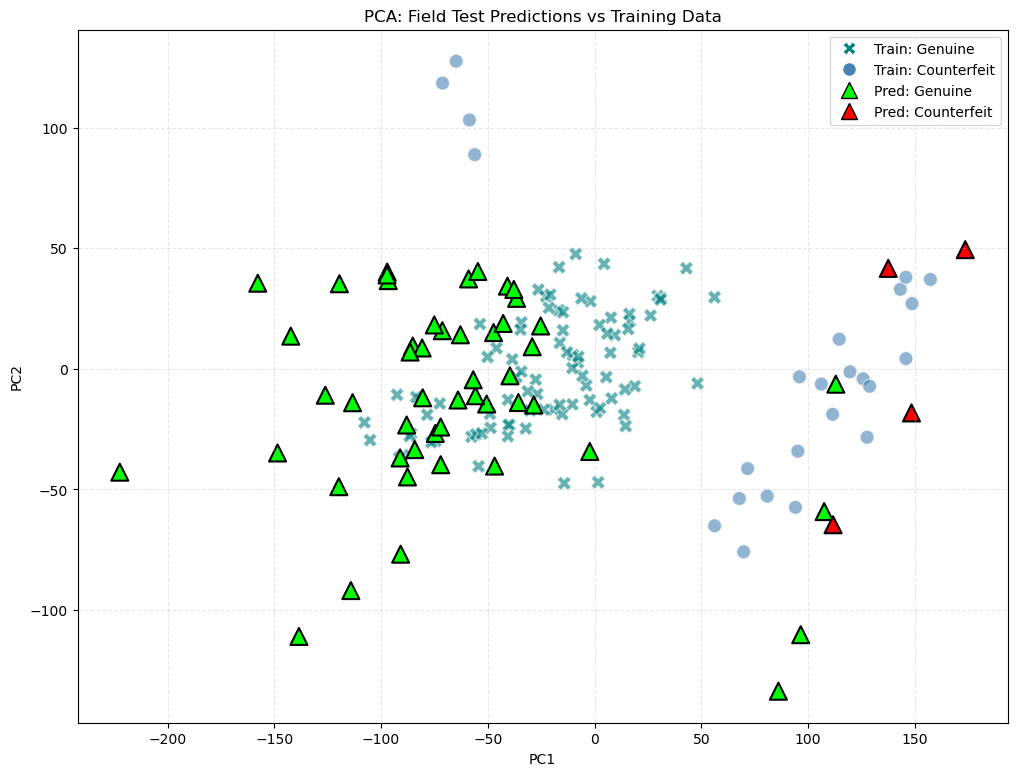

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get PCA coordinates for everyone
# (Assuming 'pipeline' is already fitted on X)
# We need to transform the data using the SAME PCA model inside the pipeline
pca_model = pipeline.named_steps['pca']
scaler_model = pipeline.named_steps['scaler']

# Transform Training Data
X_scaled = scaler_model.transform(X)
X_pca = pca_model.transform(X_scaled)

# Transform Field Test Data
X_ft_scaled = scaler_model.transform(X_ft)
X_ft_pca = pca_model.transform(X_ft_scaled)

# 2. Prepare DataFrames for plotting
# Training Data
df_plot_train = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_plot_train['Type'] = y.values
df_plot_train['Set'] = 'Training'

# Field Test Data (with Predictions)
df_plot_ft = pd.DataFrame(X_ft_pca[:, :2], columns=['PC1', 'PC2'])
df_plot_ft['Type'] = ft_predictions # This comes from your model predictions
df_plot_ft['Set'] = 'Field Test'


# 3. Plot
plt.figure(figsize=(12, 9))

# A. Plot Training Data (Reference)
# GS = Teal Cross, CF = Blue Circle
sns.scatterplot(
    data=df_plot_train, x='PC1', y='PC2', 
    hue='Type', style='Type', 
    markers={'GS': 'X', 'CF': 'o'}, 
    palette={'GS': 'teal', 'CF': 'steelblue'},
    s=100, alpha=0.6, label='_nolegend_' # Hide from legend to avoid duplicates
)

# B. Plot Field Test Data (Predictions)
# We use a DIFFERENT marker (Triangle) but the SAME colors
# Outline the markers in black to make them stand out
sns.scatterplot(
    data=df_plot_ft, x='PC1', y='PC2', 
    hue='Type', 
    marker='^', # Triangles for Field Test
    palette={'GS': 'lime', 'CF': 'red'}, # Bright colors to highlight predictions
    s=150, edgecolor='black', linewidth=1.5,
    legend='full'
)

# Custom Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='teal', markersize=10, label='Train: Genuine'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=10, label='Train: Counterfeit'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='lime', markeredgecolor='k', markersize=12, label='Pred: Genuine'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markeredgecolor='k', markersize=12, label='Pred: Counterfeit')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA: Field Test Predictions vs Training Data')
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

--- Naive Bayes Performance (5-Fold CV - F1 Macro) ---
Mean F1-Score: 0.9515
Standard Deviation: 0.0434


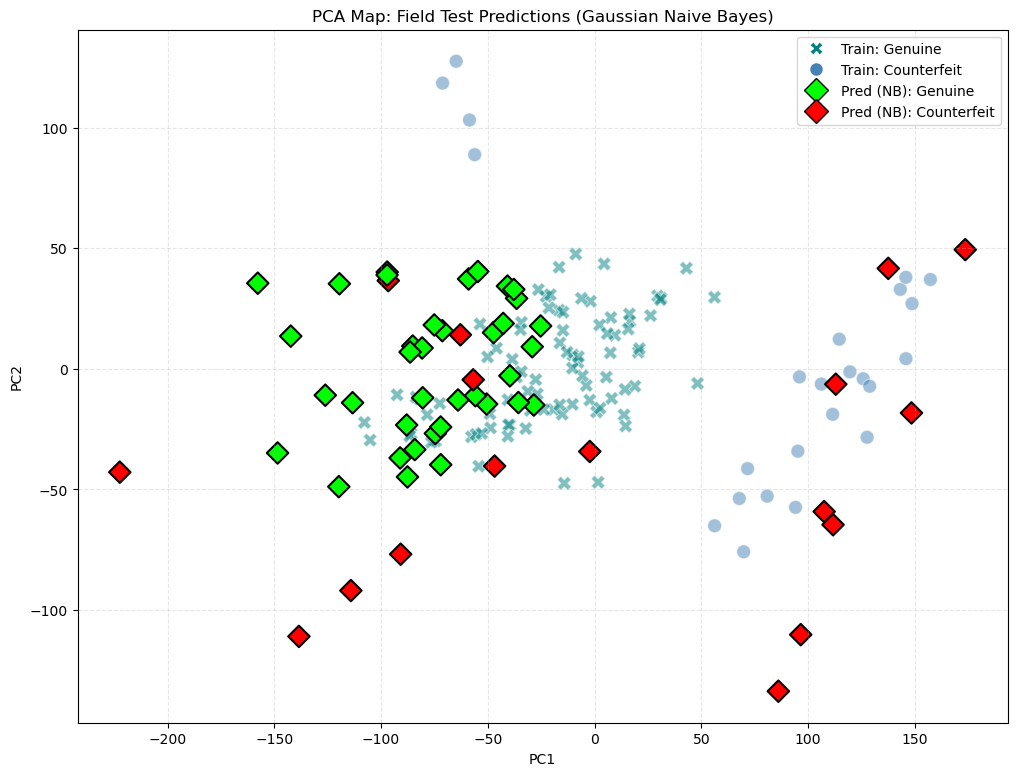


Number of samples where Naive Bayes disagrees with Logistic Regression: 13


In [21]:
from sklearn.naive_bayes import GaussianNB

# 1. Build Pipeline (Scale -> PCA -> Naive Bayes)
# GaussianNB is chosen because PCA components are continuous and often normally distributed
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)), 
    ('clf', GaussianNB())
])

# 2. Evaluate with Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_nb = cross_val_score(pipeline_nb, X, y, cv=cv, scoring='f1_macro')

print(f"--- Naive Bayes Performance (5-Fold CV - F1 Macro) ---")
print(f"Mean F1-Score: {scores_nb.mean():.4f}")
print(f"Standard Deviation: {scores_nb.std():.4f}")

# 3. Fit and Predict
pipeline_nb.fit(X, y)
ft_predictions_nb = pipeline_nb.predict(X_ft)

# 4. Visualize Results on PCA Map
# Prepare plotting data
df_plot_nb = df_plot_ft.copy()
df_plot_nb['Type'] = ft_predictions_nb # NB predictions

plt.figure(figsize=(12, 9))

# Plot Training Data (Background)
sns.scatterplot(
    data=df_plot_train, x='PC1', y='PC2', 
    hue='Type', style='Type', 
    markers={'GS': 'X', 'CF': 'o'}, 
    palette={'GS': 'teal', 'CF': 'steelblue'},
    s=100, alpha=0.5, label='_nolegend_'
)

# Plot Field Test Data (Naive Bayes Predictions)
sns.scatterplot(
    data=df_plot_nb, x='PC1', y='PC2', 
    hue='Type', 
    marker='D', # DIAMONDS for Naive Bayes
    palette={'GS': 'lime', 'CF': 'red'}, 
    s=120, edgecolor='black', linewidth=1.5,
    legend='full'
)

# Legend
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='teal', markersize=10, label='Train: Genuine'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=10, label='Train: Counterfeit'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='lime', markeredgecolor='k', markersize=12, label='Pred (NB): Genuine'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='red', markeredgecolor='k', markersize=12, label='Pred (NB): Counterfeit')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA Map: Field Test Predictions (Gaussian Naive Bayes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 5. Check if it agrees with the other models
disagreements_nb = np.sum(ft_predictions_nb != ft_predictions) # Assuming 'ft_predictions' is from LogReg/LDA
print(f"\nNumber of samples where Naive Bayes disagrees with Logistic Regression: {disagreements_nb}")

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Update Pipeline to use LDA
pipeline_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)), # Keep PCA to reduce noise/dimensions first
    ('clf', LinearDiscriminantAnalysis()) # LDA instead of LogisticRegression
])

# 2. Evaluate with Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_lda = cross_val_score(pipeline_lda, X, y, cv=cv, scoring='f1_macro')

print(f"--- LDA Performance (5-Fold CV - F1 Macro) ---")
print(f"Mean F1-Score: {scores_lda.mean():.4f}")
print(f"Standard Deviation: {scores_lda.std():.4f}")

--- LDA Performance (5-Fold CV - F1 Macro) ---
Mean F1-Score: 0.9152
Standard Deviation: 0.0749


In [36]:
# 3. Fit and Predict
pipeline_lda.fit(X, y)
ft_predictions_lda = pipeline_lda.predict(X_ft)

# 4. Compare Predictions (Did LDA change any decisions?)
# Create a quick comparison df
comparison_df = pd.DataFrame({
    'LogReg_Pred': ft_predictions,
    'LDA_Pred': ft_predictions_lda
})

# Find where they disagree
disagreements = comparison_df[comparison_df['LogReg_Pred'] != comparison_df['LDA_Pred']]
print(f"\nNumber of samples where LDA disagrees with Logistic Regression: {len(disagreements)}")
if not disagreements.empty:
    display(disagreements)


Number of samples where LDA disagrees with Logistic Regression: 0


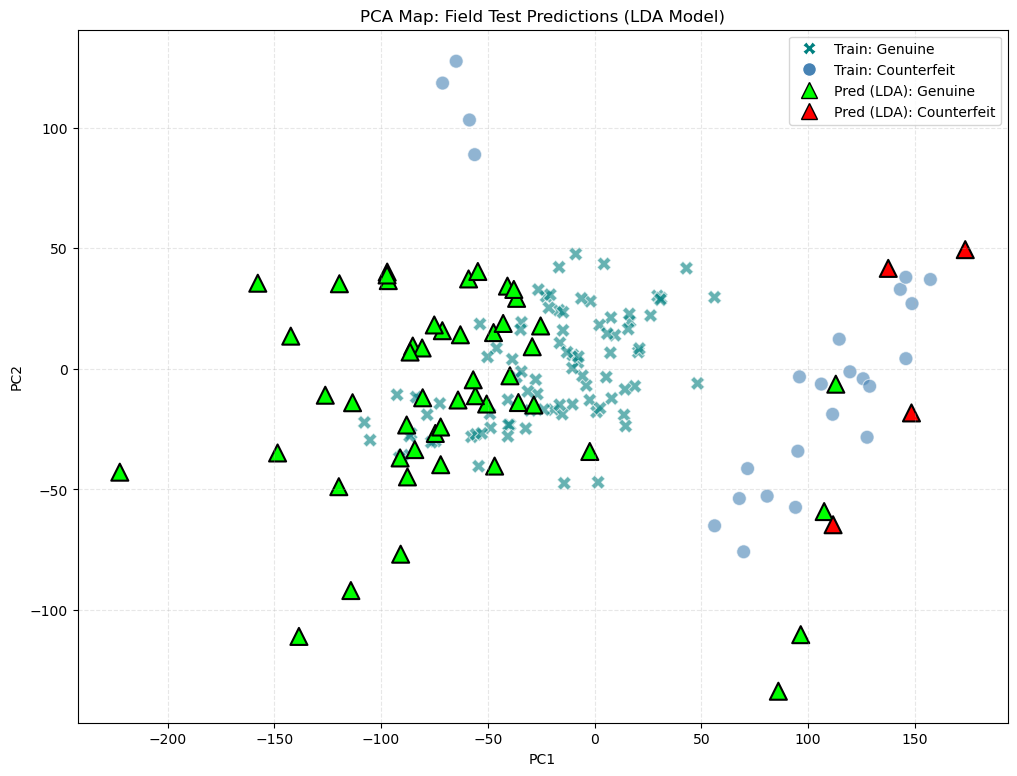

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Get Predictions from the LDA Pipeline
# Ensure the pipeline is fitted
pipeline_lda.fit(X, y)
ft_predictions_lda = pipeline_lda.predict(X_ft)

# 2. Get PCA Coordinates (Using the PCA step from the pipeline)
# We need to extract the fitted PCA and Scaler from the pipeline to transform data manually
scaler_model = pipeline_lda.named_steps['scaler']
pca_model = pipeline_lda.named_steps['pca']

# Transform Training Data
X_scaled = scaler_model.transform(X)
X_pca = pca_model.transform(X_scaled)

# Transform Field Test Data
X_ft_scaled = scaler_model.transform(X_ft)
X_ft_pca = pca_model.transform(X_ft_scaled)

# 3. Prepare DataFrames for plotting
# Training Data
df_plot_train = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_plot_train['Type'] = y.values
df_plot_train['Set'] = 'Training'

# Field Test Data (with LDA Predictions)
df_plot_ft = pd.DataFrame(X_ft_pca[:, :2], columns=['PC1', 'PC2'])
df_plot_ft['Type'] = ft_predictions_lda  # <--- Using LDA predictions here
df_plot_ft['Set'] = 'Field Test'

# 4. Plot
plt.figure(figsize=(12, 9))

# A. Plot Training Data (Reference)
sns.scatterplot(
    data=df_plot_train, x='PC1', y='PC2', 
    hue='Type', style='Type', 
    markers={'GS': 'X', 'CF': 'o'}, 
    palette={'GS': 'teal', 'CF': 'steelblue'},
    s=100, alpha=0.6, label='_nolegend_'
)

# B. Plot Field Test Data (LDA Predictions)
sns.scatterplot(
    data=df_plot_ft, x='PC1', y='PC2', 
    hue='Type', 
    marker='^', 
    palette={'GS': 'lime', 'CF': 'red'}, 
    s=150, edgecolor='black', linewidth=1.5,
    legend='full'
)

# Custom Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='teal', markersize=10, label='Train: Genuine'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=10, label='Train: Counterfeit'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='lime', markeredgecolor='k', markersize=12, label='Pred (LDA): Genuine'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markeredgecolor='k', markersize=12, label='Pred (LDA): Counterfeit')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA Map: Field Test Predictions (LDA Model)')
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

--- Random Forest Performance (5-Fold CV - F1 Macro) ---
Mean F1-Score: 0.9678
Standard Deviation: 0.0660


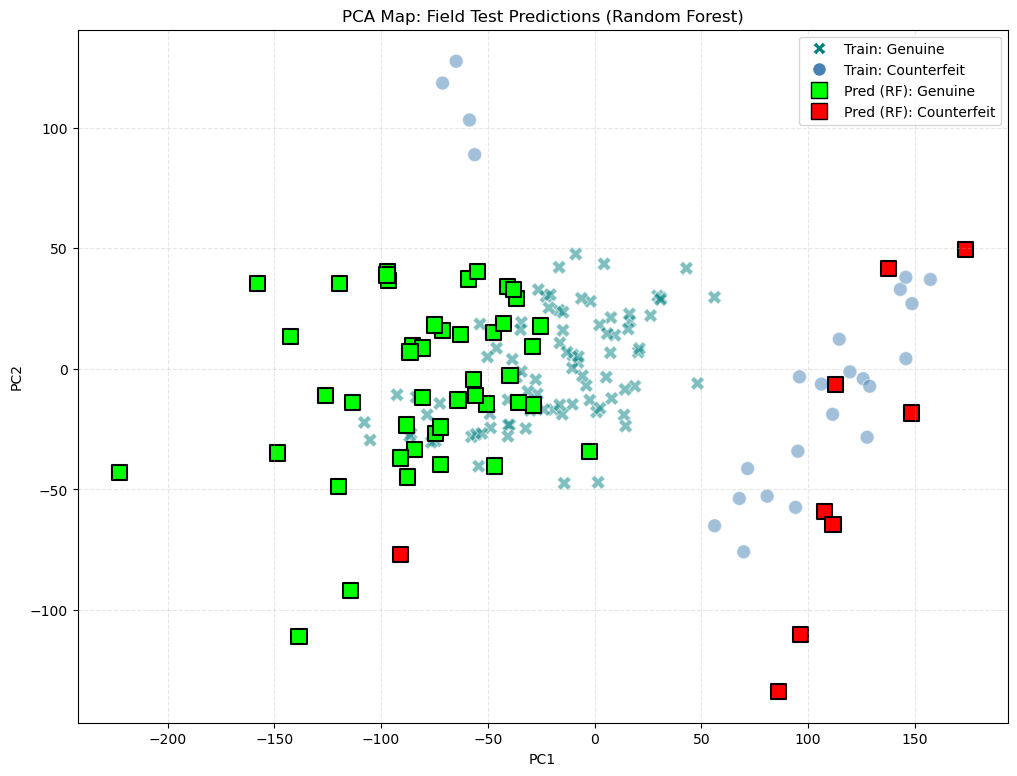


Número de muestras donde Random Forest difiere de LDA: 5


In [42]:
from sklearn.ensemble import RandomForestClassifier

# 1. Pipeline con Random Forest
# Aumentamos n_estimators para estabilidad (100 -> 200)
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)), 
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# 2. Evaluar con Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_rf = cross_val_score(pipeline_rf, X, y, cv=cv, scoring='f1_macro')

print(f"--- Random Forest Performance (5-Fold CV - F1 Macro) ---")
print(f"Mean F1-Score: {scores_rf.mean():.4f}")
print(f"Standard Deviation: {scores_rf.std():.4f}")

# 3. Entrenar y Predecir
pipeline_rf.fit(X, y)
ft_predictions_rf = pipeline_rf.predict(X_ft)

# 4. Generar el Gráfico PCA con predicciones de RF
# Usamos el MISMO código de ploteo, solo cambiamos las predicciones

# Preparar DataFrame para plotear (reciclando coordenadas PCA calculadas antes, son las mismas)
df_plot_ft_rf = df_plot_ft.copy()
df_plot_ft_rf['Type'] = ft_predictions_rf # <--- Predicciones de Random Forest

plt.figure(figsize=(12, 9))

# A. Training Data (Fondo)
sns.scatterplot(
    data=df_plot_train, x='PC1', y='PC2', 
    hue='Type', style='Type', 
    markers={'GS': 'X', 'CF': 'o'}, 
    palette={'GS': 'teal', 'CF': 'steelblue'},
    s=100, alpha=0.5, label='_nolegend_'
)

# B. Field Test Data (Random Forest Predictions)
sns.scatterplot(
    data=df_plot_ft_rf, x='PC1', y='PC2', 
    hue='Type', 
    marker='s', # Usamos CUADRADOS para distinguir RF visualmente de los anteriores
    palette={'GS': 'lime', 'CF': 'red'}, 
    s=120, edgecolor='black', linewidth=1.5,
    legend='full'
)

# Leyenda
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='teal', markersize=10, label='Train: Genuine'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=10, label='Train: Counterfeit'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='lime', markeredgecolor='k', markersize=12, label='Pred (RF): Genuine'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markeredgecolor='k', markersize=12, label='Pred (RF): Counterfeit')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA Map: Field Test Predictions (Random Forest)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 5. Comparar RF vs LDA (Ver dónde cambian de opinión)
disagreements_rf = np.sum(ft_predictions_rf != ft_predictions_lda)
print(f"\nNúmero de muestras donde Random Forest difiere de LDA: {disagreements_rf}")

In [39]:
# Random Forest SIN PCA (Directo sobre los datos crudos)
# Nota: No necesitamos Scaler aquí teóricamente, pero no hace daño.
pipeline_rf_raw = Pipeline([
    # ('scaler', StandardScaler()), # Opcional para RF, irrelevante
    # ('pca', PCA(...)),            # REMOVIDO
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# Evaluar
scores_rf_raw = cross_val_score(pipeline_rf_raw, X, y, cv=cv, scoring='f1_macro')

print(f"--- Random Forest RAW (Sin PCA) Performance ---")
print(f"Mean F1-Score: {scores_rf_raw.mean():.4f}")

# Entrenar y Predecir
pipeline_rf_raw.fit(X, y)
ft_pred_rf_raw = pipeline_rf_raw.predict(X_ft)

# Comparar con el modelo anterior (RF con PCA)
diff = np.sum(ft_pred_rf_raw != ft_predictions_rf)
print(f"Diferencia de predicciones entre RF-con-PCA y RF-sin-PCA: {diff} muestras")

--- Random Forest RAW (Sin PCA) Performance ---
Mean F1-Score: 0.9296
Diferencia de predicciones entre RF-con-PCA y RF-sin-PCA: 1 muestras


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class SIMCAModel:
    def __init__(self, n_components=10, confidence=0.95):
        self.n_components = n_components
        self.confidence = confidence
        self.models = {}
        self.limits = {}
        self.scalers = {}

    def fit(self, X, y):
        """Train a separate PCA model for each class."""
        self.classes_ = np.unique(y)
        
        for cls in self.classes_:
            # 1. Select data for this class
            X_cls = X[y == cls]
            
            # 2. Scale separately (SIMCA requirement)
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_cls)
            self.scalers[cls] = scaler
            
            # 3. Fit PCA
            pca = PCA(n_components=self.n_components)
            pca.fit(X_scaled)
            self.models[cls] = pca
            
            # 4. Calculate Limits (Orthogonal Distance / Q-Statistic)
            # Reconstruct training data to find residual errors
            X_recon = pca.inverse_transform(pca.transform(X_scaled))
            residuals = X_scaled - X_recon
            q_scores = np.sum(residuals**2, axis=1)
            
            # Set limit at 95th percentile (or user defined)
            self.limits[cls] = np.quantile(q_scores, self.confidence)

    def predict_distance(self, X):
        """Calculate Q-distance (residual) to each class model."""
        distances = {}
        for cls in self.classes_:
            scaler = self.scalers[cls]
            pca = self.models[cls]
            
            # Scale using THIS class's scaler
            X_scaled = scaler.transform(X)
            
            # Project and Reconstruct
            X_recon = pca.inverse_transform(pca.transform(X_scaled))
            residuals = X_scaled - X_recon
            
            # Calculate Squared Residual Distance (Q)
            q_scores = np.sum(residuals**2, axis=1)
            distances[cls] = q_scores
            
        return pd.DataFrame(distances)

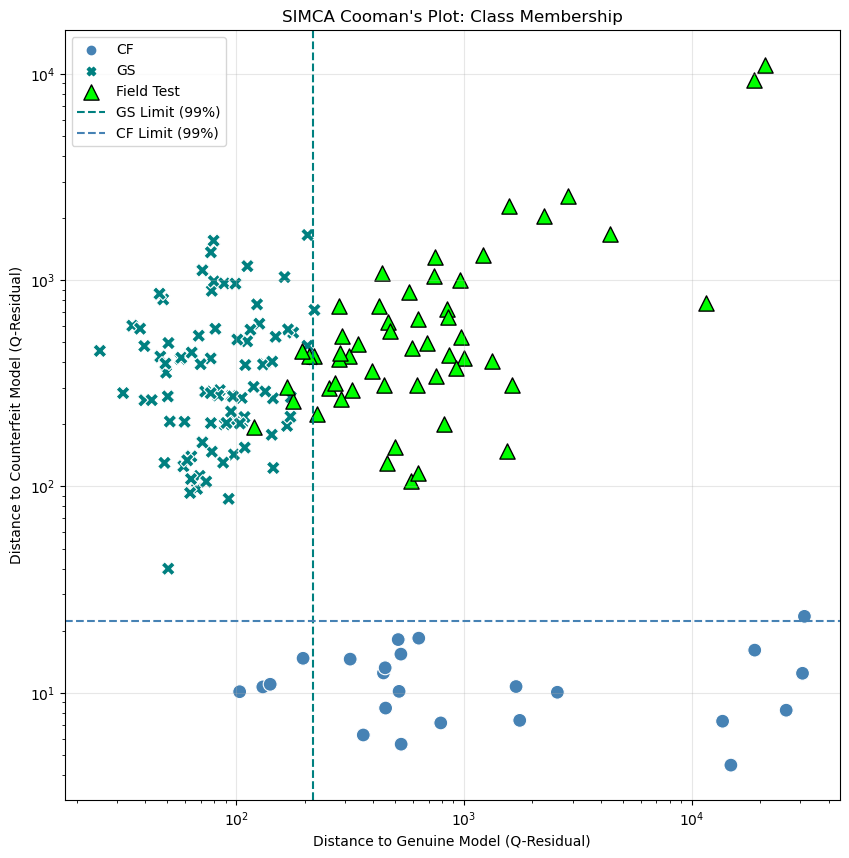

In [10]:
# 1. Train SIMCA
# We use 10 components as before
simca = SIMCAModel(n_components=10, confidence=0.99) # 99% confidence to be safe
simca.fit(X, y)

# 2. Calculate Distances for ALL samples (Train + Field Test)
# We calculate how far every sample is from the Genuine Model vs Counterfeit Model
dist_train = simca.predict_distance(X)
dist_ft = simca.predict_distance(X_ft)

# Add labels for plotting
dist_train['Type'] = y.values
dist_train['Set'] = 'Training'

dist_ft['Type'] = 'Field Test' # Unknown for now
dist_ft['Set'] = 'Field Test'

# Combine for plotting
all_dists = pd.concat([dist_train, dist_ft])

# 3. Cooman's Plot (Distance to GS vs Distance to CF)
plt.figure(figsize=(10, 10))

# Plot Training Data
sns.scatterplot(data=dist_train, x='GS', y='CF', hue='Type', style='Type', 
                s=100, palette={'GS': 'teal', 'CF': 'steelblue'})

# Plot Field Test Data
plt.scatter(dist_ft['GS'], dist_ft['CF'], c='lime', marker='^', s=120, edgecolors='k', label='Field Test')

# Draw Limits (The "Box")
limit_gs = simca.limits['GS']
limit_cf = simca.limits['CF']

plt.axvline(limit_gs, color='teal', linestyle='--', label='GS Limit (99%)')
plt.axhline(limit_cf, color='steelblue', linestyle='--', label='CF Limit (99%)')

# Formatting
plt.title("SIMCA Cooman's Plot: Class Membership")
plt.xlabel('Distance to Genuine Model (Q-Residual)')
plt.ylabel('Distance to Counterfeit Model (Q-Residual)')
plt.legend()
plt.grid(True, alpha=0.3)

# Log scale is often helpful if distances vary wildly
plt.xscale('log')
plt.yscale('log')

plt.show()

In [11]:
# Extract the distances calculated previously
df_results = dist_ft.copy()
df_results['Run_ID'] = field_test_data['run_id'].values # Add Run IDs back

# Define limits from the trained SIMCA model
lim_gs = simca.limits['GS']
lim_cf = simca.limits['CF']

# Classify based on quadrants
def classify_simca(row):
    is_gs = row['GS'] <= lim_gs
    is_cf = row['CF'] <= lim_cf
    
    if is_gs and not is_cf:
        return 'Confirmed Genuine'
    elif is_cf and not is_gs:
        return 'Confirmed Counterfeit'
    elif is_gs and is_cf:
        return 'Ambiguous (Matches Both)'
    else:
        return 'Anomaly (Matches Neither)'

df_results['SIMCA_Prediction'] = df_results.apply(classify_simca, axis=1)

# Summary
print("--- Final Classification by SIMCA ---")
print(df_results['SIMCA_Prediction'].value_counts())

# Show the list of Anomalies
anomalies = df_results[df_results['SIMCA_Prediction'] == 'Anomaly (Matches Neither)']
print(f"\n--- List of {len(anomalies)} Anomalous Samples (High Risk) ---")
display(anomalies[['Run_ID', 'GS', 'CF']].sort_values('GS'))

--- Final Classification by SIMCA ---
SIMCA_Prediction
Anomaly (Matches Neither)    49
Confirmed Genuine             5
Name: count, dtype: int64

--- List of 49 Anomalous Samples (High Risk) ---


,Run_ID,GS,CF
31,4131TA0C,220.457117,426.910102
52,4131TAZW,226.857648,224.228405
8,4143IE1O,255.284357,300.782798
50,4131TAYL,272.804885,316.852583
33,4131TA45,281.869358,415.775752
42,4131TAJ0,282.376085,746.395072
38,4131TA9J,285.712469,441.517130
17,4143IEEG,289.445174,264.555569
47,4131TAQX,292.936627,536.307701
18,4143IEHB,312.642825,428.577838


In [13]:
import plotly.graph_objects as go

# 1. Prepare Data for Plotting
# Ensure Run_ID is attached to the distance dataframes
dist_ft['Run_ID'] = field_test_data['run_id'].values
dist_train['Run_ID'] = known_data['run_id'].values 

# Extract limits
limit_gs = simca.limits['GS']
limit_cf = simca.limits['CF']

# 2. Create Plotly Figure
fig = go.Figure()

# --- Trace 1: Training Data (Genuine) ---
df_gs = dist_train[dist_train['Type'] == 'GS']
fig.add_trace(go.Scatter(
    x=df_gs['GS'], y=df_gs['CF'],
    mode='markers',
    name='Train: Genuine',
    marker=dict(color='teal', symbol='x', size=8),
    text=df_gs['Run_ID'], # This shows up on hover
    hovertemplate="<b>ID: %{text}</b><br>Dist GS: %{x:.1f}<br>Dist CF: %{y:.1f}<extra></extra>"
))

# --- Trace 2: Training Data (Counterfeit) ---
df_cf = dist_train[dist_train['Type'] == 'CF']
fig.add_trace(go.Scatter(
    x=df_cf['GS'], y=df_cf['CF'],
    mode='markers',
    name='Train: Counterfeit',
    marker=dict(color='steelblue', symbol='circle', size=8),
    text=df_cf['Run_ID'],
    hovertemplate="<b>ID: %{text}</b><br>Dist GS: %{x:.1f}<br>Dist CF: %{y:.1f}<extra></extra>"
))

# --- Trace 3: Field Test Data (Unknowns) ---
fig.add_trace(go.Scatter(
    x=dist_ft['GS'], y=dist_ft['CF'],
    mode='markers',
    name='Field Test',
    marker=dict(color='lime', symbol='triangle-up', size=12, line=dict(color='black', width=1)),
    text=dist_ft['Run_ID'],
    hovertemplate="<b>ID: %{text}</b><br>Dist GS: %{x:.1f}<br>Dist CF: %{y:.1f}<extra></extra>"
))

# 3. Add Limits (The Box)
fig.add_vline(x=limit_gs, line_dash="dash", line_color="teal", annotation_text="GS Limit")
fig.add_hline(y=limit_cf, line_dash="dash", line_color="steelblue", annotation_text="CF Limit")

max_x = np.quantile(dist_train['GS'], 0.99) * 50
max_y = np.quantile(dist_train['CF'], 0.99) * 50

# Update Layout with fixed ranges
fig.update_layout(
    title="Interactive SIMCA Cooman's Plot (Zoomed In)",
    xaxis_title="Distance to Genuine Model (Q-Residual)",
    yaxis_title="Distance to Counterfeit Model (Q-Residual)",
    xaxis_type="log", 
    yaxis_type="log",
    width=900,
    height=800,
    template="plotly_white",
    # FIX: Explicitly set the range for the log axes
    # np.log10 because Plotly log axes expect log10 values for range
    xaxis=dict(range=[np.log10(dist_train['GS'].min()), np.log10(max_x)]),
    yaxis=dict(range=[np.log10(dist_train['CF'].min()), np.log10(max_y)]),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

Model built using 6 Principal Components.
Thresholds determined -> T2 Limit: 10.98, Q Limit: 451.11


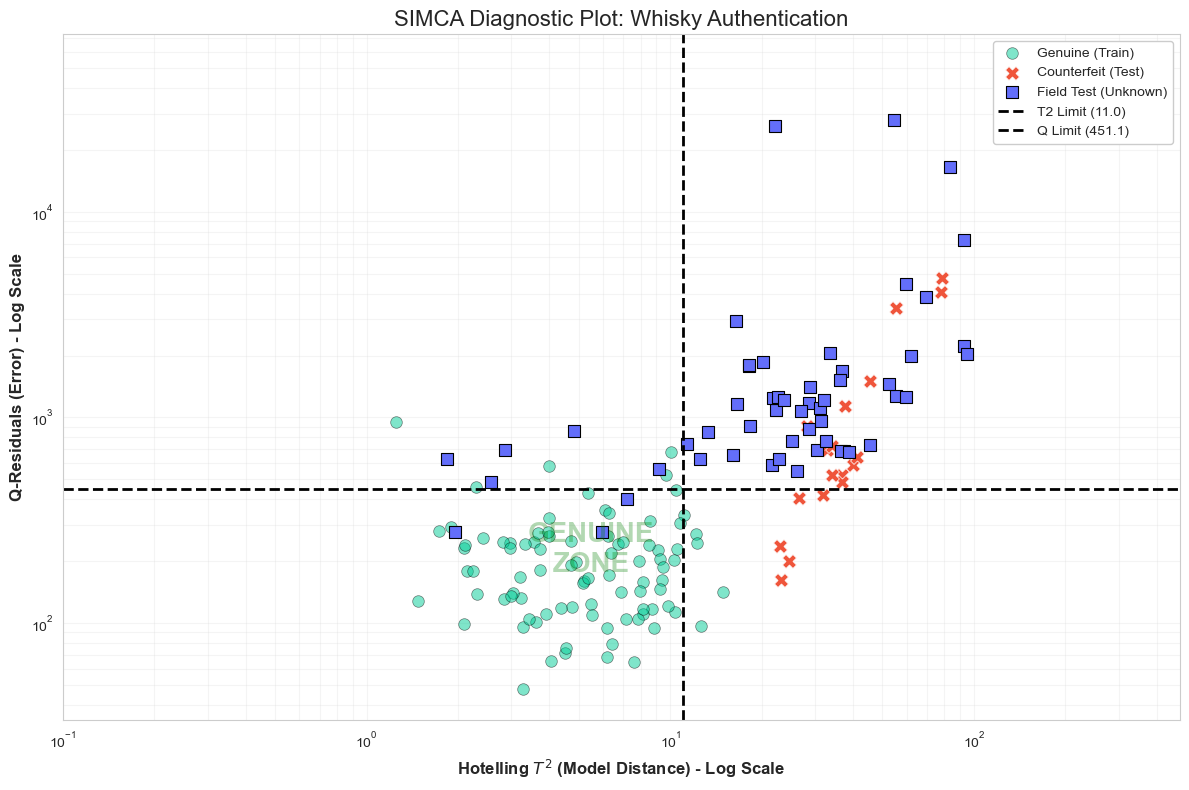


--- Field Test Predictions ---
      Run_ID         T2            Q   Prediction
65  4140IE0E  30.351742   692.120747  Counterfeit
66  4140IE88  92.560059  7293.861643  Counterfeit
67  4140IEGB  37.221840   689.472257  Counterfeit
68  4140IEGJ  21.672145   588.633246  Counterfeit
69  4140IEMF  62.017471  1996.940892  Counterfeit


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. SETUP & DATA LOADING
# ==========================================
# Replace 'your_data.csv' with your actual file path
# Assuming the first column is 'type' and second is 'run_id'
df = pd.read_csv('CONFIDENTIALdata.csv')

# Separate labels and features
# We drop 'type' and 'run_id' to get just the 5590 reading columns
X = df.drop(columns=['type', 'run_id']) 
y = df['type']

# ==========================================
# 2. DEFINE TRAINING SET (GENUINE ONLY)
# ==========================================
# SIMCA trains ONLY on the target class (Genuine Samples - GS)
# We also want to hold out the Field Tests (FT) and Counterfeits (CF) for testing
X_train_genuine = X[y == 'GS']

# We can also keep the Counterfeits to verify our model works later
X_test_counterfeit = X[y == 'CF']
X_field_test = X[y == 'FT']

# Scale the data (Critical for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_genuine)

# ==========================================
# 3. BUILD THE MODEL (PCA)
# ==========================================
# We need to decide how many components to keep. 
# For now, let's pick enough to explain 95% of the variance (common standard)
pca = PCA(n_components=0.95) 
pca.fit(X_train_scaled)

# Calculate the "Scores" (Coordinates in the new PCA space)
scores_train = pca.transform(X_train_scaled)

print(f"Model built using {pca.n_components_} Principal Components.")

# ==========================================
# 4. CALCULATE SIMCA METRICS (The "Fence")
# ==========================================

def calculate_metrics(pca_model, data_scaled):
    """
    Helper to calculate T2 (Score Distance) and Q (Residual Distance)
    """
    # 1. T-Squared (Distance from center INSIDE the model)
    # Formula: sum(score^2 / eigenvalue)
    scores = pca_model.transform(data_scaled)
    eigenvalues = pca_model.explained_variance_
    t2 = np.sum((scores ** 2) / eigenvalues, axis=1)
    
    # 2. Q-Statistic (Distance OFF the model plane / Residuals)
    # Formula: sum((original - reconstructed)^2)
    reconstructed = pca_model.inverse_transform(scores)
    residuals = data_scaled - reconstructed
    q = np.sum(residuals ** 2, axis=1)
    
    return t2, q

# Calculate metrics for the training set (Genuine samples)
t2_train, q_train = calculate_metrics(pca, X_train_scaled)

# Define Thresholds (The "Walls")
# A simple, robust way is to take the 95th percentile of the training data
# (Anything outside this 95% limit is considered suspicious)
t2_limit = np.percentile(t2_train, 95)
q_limit = np.percentile(q_train, 95)

print(f"Thresholds determined -> T2 Limit: {t2_limit:.2f}, Q Limit: {q_limit:.2f}")

# ==========================================
# 5. TEST THE MODEL (Predict on New Data)
# ==========================================

# Prepare the test data (Field Tests & Counterfeits)
# IMPORTANT: Use the SAME scaler from the training step
X_ft_scaled = scaler.transform(X_field_test)
X_cf_scaled = scaler.transform(X_test_counterfeit)

# Calculate their metrics
t2_ft, q_ft = calculate_metrics(pca, X_ft_scaled)
t2_cf, q_cf = calculate_metrics(pca, X_cf_scaled)

# ==========================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns # Optional, makes styling nicer automatically

# Set a professional style
sns.set_style("whitegrid") 

plt.figure(figsize=(12, 8))

# 1. Plot Genuine Training Data (The "Cluster")
# We use alpha (transparency) and black edges to see density
plt.scatter(t2_train, q_train, c='#00CC96', label='Genuine (Train)', 
            alpha=0.5, s=70, edgecolor='k', linewidth=0.5)

# 2. Plot Counterfeits (The "Outliers")
plt.scatter(t2_cf, q_cf, c='#EF553B', marker='X', label='Counterfeit (Test)', 
            s=100, edgecolor='w', linewidth=0.5)

# 3. Plot Field Tests (The "Unknowns")
# Using a bright color (Purple) to distinguish them from the training data
plt.scatter(t2_ft, q_ft, c='#636EFA', marker='s', label='Field Test (Unknown)', 
            s=80, edgecolor='k', linewidth=0.8)

# 4. Add the Threshold Lines
plt.axvline(t2_limit, color='k', linestyle='--', linewidth=2, label=f'T2 Limit ({t2_limit:.1f})')
plt.axhline(q_limit, color='k', linestyle='--', linewidth=2, label=f'Q Limit ({q_limit:.1f})')

# 5. KEY FIX: Logarithmic Scales
# This spreads out the small values so you can see the "Safe Zone"
plt.xscale('log')
plt.yscale('log')

# 6. Formatting
plt.xlabel('Hotelling $T^2$ (Model Distance) - Log Scale', fontsize=12, fontweight='bold')
plt.ylabel('Q-Residuals (Error) - Log Scale', fontsize=12, fontweight='bold')
plt.title('SIMCA Diagnostic Plot: Whisky Authentication', fontsize=16)
plt.legend(frameon=True, facecolor='white', framealpha=1, loc='upper right')

# Add a text annotation for the "Safe Zone"
plt.text(t2_limit/2, q_limit/2, 'GENUINE\nZONE', 
         ha='center', va='center', color='green', fontweight='bold', alpha=0.3, fontsize=20)

# Adjust axis limits to look nice (add some padding)
plt.xlim(left=min(t2_train.min(), 0.1)) # Avoid 0 if present
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# ==========================================
# 7. AUTOMATED CLASSIFICATION
# ==========================================
# Create a DataFrame for Field Test results
results = pd.DataFrame({
    'Run_ID': df.loc[X_field_test.index, 'run_id'],
    'T2': t2_ft,
    'Q': q_ft
})

# Logic: If T2 < Limit AND Q < Limit, then it is Genuine
results['Prediction'] = np.where(
    (results['T2'] <= t2_limit) & (results['Q'] <= q_limit), 
    'Genuine', 
    'Counterfeit'
)

print("\n--- Field Test Predictions ---")
print(results.head())

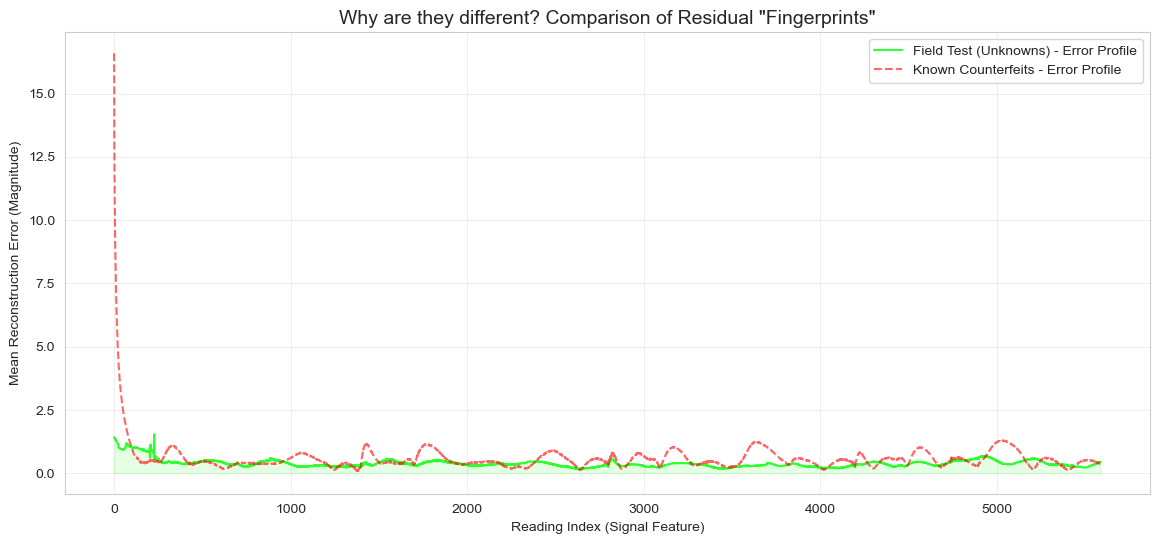

In [19]:
# 1. Calculate Residuals (Reconstruction Error) for both groups
# We use the Genuine PCA model to see what it "can't explain" about these samples
X_ft_scaled = scaler.transform(X_field_test)
X_cf_scaled = scaler.transform(X_test_counterfeit)

# Reconstruct
recon_ft = pca.inverse_transform(pca.transform(X_ft_scaled))
recon_cf = pca.inverse_transform(pca.transform(X_cf_scaled))

# Calculate Absolute Residuals
residuals_ft = np.abs(X_ft_scaled - recon_ft)
residuals_cf = np.abs(X_cf_scaled - recon_cf)

# 2. Compute Mean Residual Spectrum (The "Error Fingerprint")
mean_resid_ft = residuals_ft.mean(axis=0)
mean_resid_cf = residuals_cf.mean(axis=0)

# 3. Plot Comparison
plt.figure(figsize=(14, 6))

x_axis = np.arange(len(mean_resid_ft))

# Plot Field Test Error Profile
plt.plot(x_axis, mean_resid_ft, color='lime', alpha=0.8, label='Field Test (Unknowns) - Error Profile')
plt.fill_between(x_axis, mean_resid_ft, color='lime', alpha=0.1)

# Plot Known Counterfeit Error Profile
plt.plot(x_axis, mean_resid_cf, color='red', alpha=0.6, linestyle='--', label='Known Counterfeits - Error Profile')

plt.title('Why are they different? Comparison of Residual "Fingerprints"', fontsize=14)
plt.ylabel('Mean Reconstruction Error (Magnitude)')
plt.xlabel('Reading Index (Signal Feature)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Cleaning code

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

#### 1. Data Preparation

In [ ]:
# Separate Known (Train) vs Unknown (Field Test)
known_data = data[data['type'].isin(['GS', 'CF'])].copy()
field_test_data = data[data['type'] == 'FT'].copy()

# Extract Features (Signal) and Labels
X = known_data.select_dtypes(include=[np.number])
y = known_data['type'] # 'GS' or 'CF'

# Extract Features for Field Test
X_ft = field_test_data.select_dtypes(include=[np.number])

#### 2. Build Pipeline (Scale -> PCA -> Logistic Regression)

In [22]:
model = LogisticRegression(random_state=42)

In [23]:
# We choose n_components=10 based on your previous scree plot (usually covers >95% variance)
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('pca', PCA(n_components=10)),     # Reduce dimensions
    ('clf', model) # Classifier
])

#### 3. Evaluate Model (Cross-Validation)

In [ ]:
# We use StratifiedKFold to ensure GS/CF ratio is preserved in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

print(f"--- Model Performance (5-Fold CV) ---")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\javie\anaconda3\envs\globx_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea


--- Detailed LOOCV Performance ---
Accuracy:    0.9646
Sensitivity (True Positive Rate): 0.9663
Specificity (True Negative Rate): 0.9583
AUC Score:   0.9972
------------------------------
Confusion Matrix Breakdown:
True  Genuine (TP): 86
False Counterfeit (FN): 3 (Genuine samples mistakely rejected)
True  Counterfeit (TN): 23
False Genuine     (FP): 1 (Counterfeits mistakenly accepted)


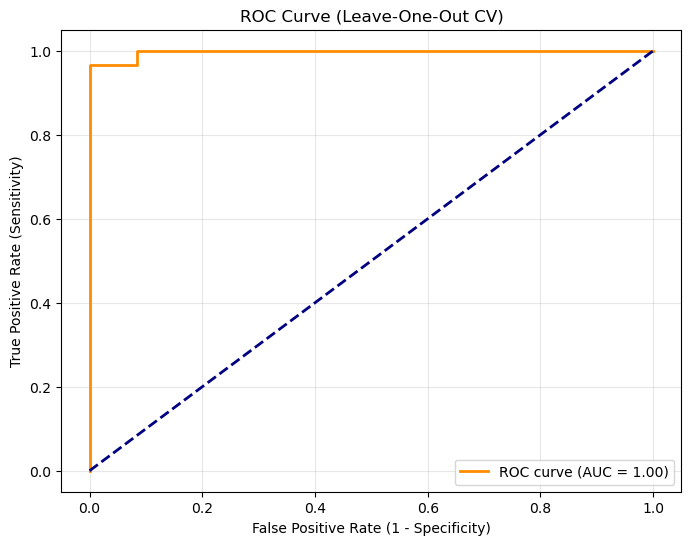

In [27]:
# 1. Setup LOOCV
loo = LeaveOneOut()

# 2. Get LOO Predictions
# We get the probability of being class 1 (GS/Genuine)
y_pred_loo = cross_val_predict(pipeline, X, y, cv=loo)
y_probs_loo = cross_val_predict(pipeline, X, y, cv=loo, method='predict_proba')

# Map labels to binary for stats: 1 = Genuine, 0 = Counterfeit
y_binary = (y == 'GS').astype(int)      
y_probs_gs = y_probs_loo[:, 1]          

# 3. Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred_loo, labels=['CF', 'GS']).ravel()

# 4. Calculate Metrics
sensitivity = tp / (tp + fn) # TPR: How many Genuine samples were accepted?
specificity = tn / (tn + fp) # TNR: How many Counterfeits were rejected?
accuracy = (tp + tn) / (tp + tn + fp + fn)

# AUC Score
roc_auc = roc_auc_score(y_binary, y_probs_gs)

print("\n--- Detailed LOOCV Performance ---")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"AUC Score:   {roc_auc:.4f}")
print("-" * 30)
print("Confusion Matrix Breakdown:")
print(f"True  Genuine (TP): {tp}")
print(f"False Counterfeit (FN): {fn} (Genuine samples mistakely rejected)")
print(f"True  Counterfeit (TN): {tn}")
print(f"False Genuine     (FP): {fp} (Counterfeits mistakenly accepted)")

# 5. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_binary, y_probs_gs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve (Leave-One-Out CV)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()